## DBSCAN and Clustering Examples

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [33]:
X, y = datasets.make_blobs(n_samples=1000, centers=2, n_features=2,cluster_std=0.05,random_state=0)
two_blobs = pd.DataFrame(X, columns = ['X1','X2'])
X, y = datasets.make_blobs(n_samples=1000, centers=2, n_features=2,cluster_std=0.60,random_state=0)
two_blobs_outliers = pd.DataFrame(X, columns = ['X1','X2'])

<Axes: xlabel='X1', ylabel='X2'>

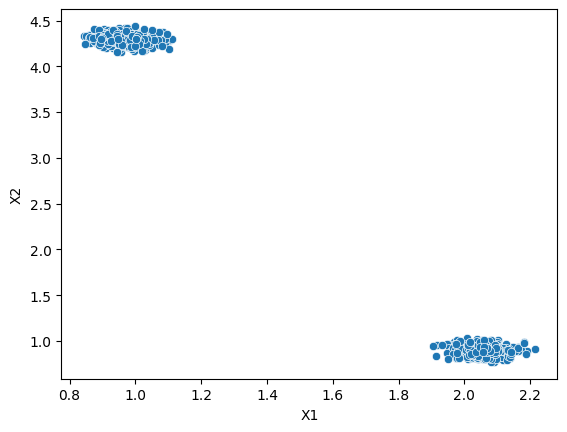

In [34]:
sns.scatterplot(data=two_blobs,x='X1',y='X2')

<Axes: xlabel='X1', ylabel='X2'>

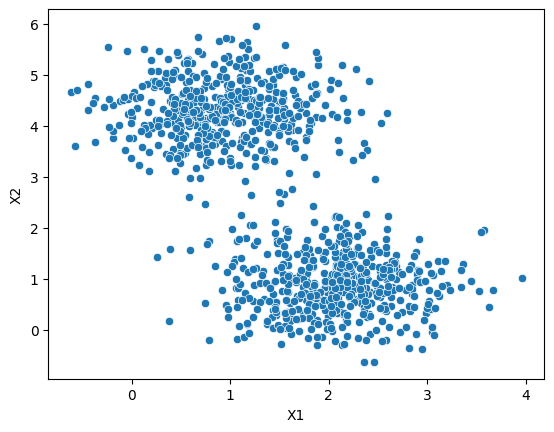

In [35]:
sns.scatterplot(data=two_blobs_outliers,x='X1',y='X2')

## Label Discovery

In [36]:
def display_categories(model,data):
    labels = model.fit_predict(data)
    sns.scatterplot(data=data,x='X1',y='X2',hue=labels,palette='Set1')

## DBSCAN

In [37]:
from sklearn.cluster import DBSCAN

In [38]:
help(DBSCAN)

Help on class DBSCAN in module sklearn.cluster._dbscan:

class DBSCAN(sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  DBSCAN(eps=0.5, *, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)
 |  
 |  Perform DBSCAN clustering from vector array or distance matrix.
 |  
 |  DBSCAN - Density-Based Spatial Clustering of Applications with Noise.
 |  Finds core samples of high density and expands clusters from them.
 |  Good for data which contains clusters of similar density.
 |  
 |  Read more in the :ref:`User Guide <dbscan>`.
 |  
 |  Parameters
 |  ----------
 |  eps : float, default=0.5
 |      The maximum distance between two samples for one to be considered
 |      as in the neighborhood of the other. This is not a maximum bound
 |      on the distances of points within a cluster. This is the most
 |      important DBSCAN parameter to choose appropriately for your data set
 |      and distance function.
 |  
 |  min_sam

In [39]:
dbscan = DBSCAN()

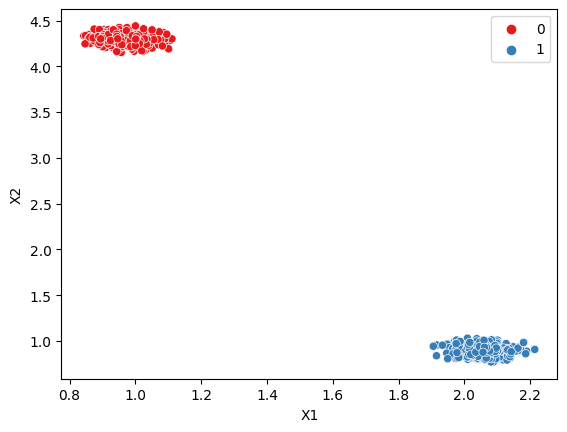

In [40]:
display_categories(dbscan,two_blobs)

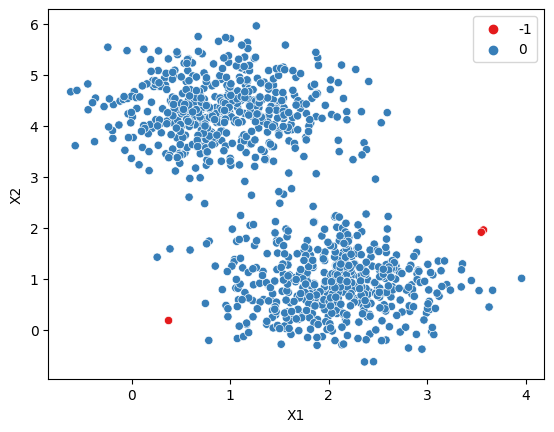

In [41]:

display_categories(dbscan,two_blobs_outliers)

# Epsilon

    eps : float, default=0.5
     |      The maximum distance between two samples for one to be considered
     |      as in the neighborhood of the other. This is not a maximum bound
     |      on the distances of points within a cluster. This is the most
     |      important DBSCAN parameter to choose appropriately for your data set
     |      and distance function.

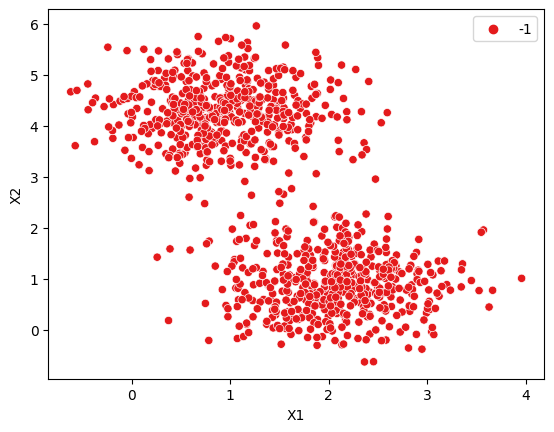

In [57]:
# For small Epsilon values = small distances between points = all points is an outlier (class=-1)
dbscan = DBSCAN(eps=0.0001)
display_categories(dbscan,two_blobs_outliers)

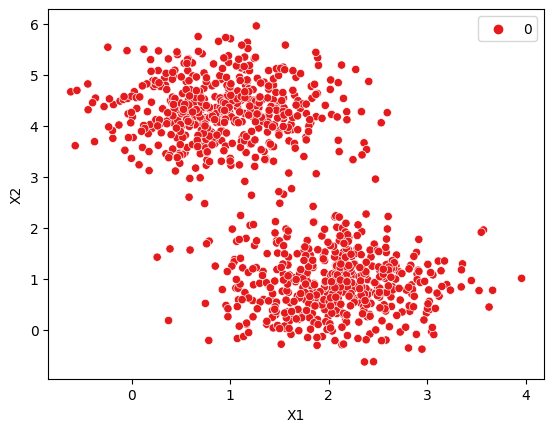

In [58]:
# Large values of epsilon --> large distances between points --> all points belong to the same cluster (class=0)
dbscan = DBSCAN(eps=10)
display_categories(dbscan,two_blobs_outliers)

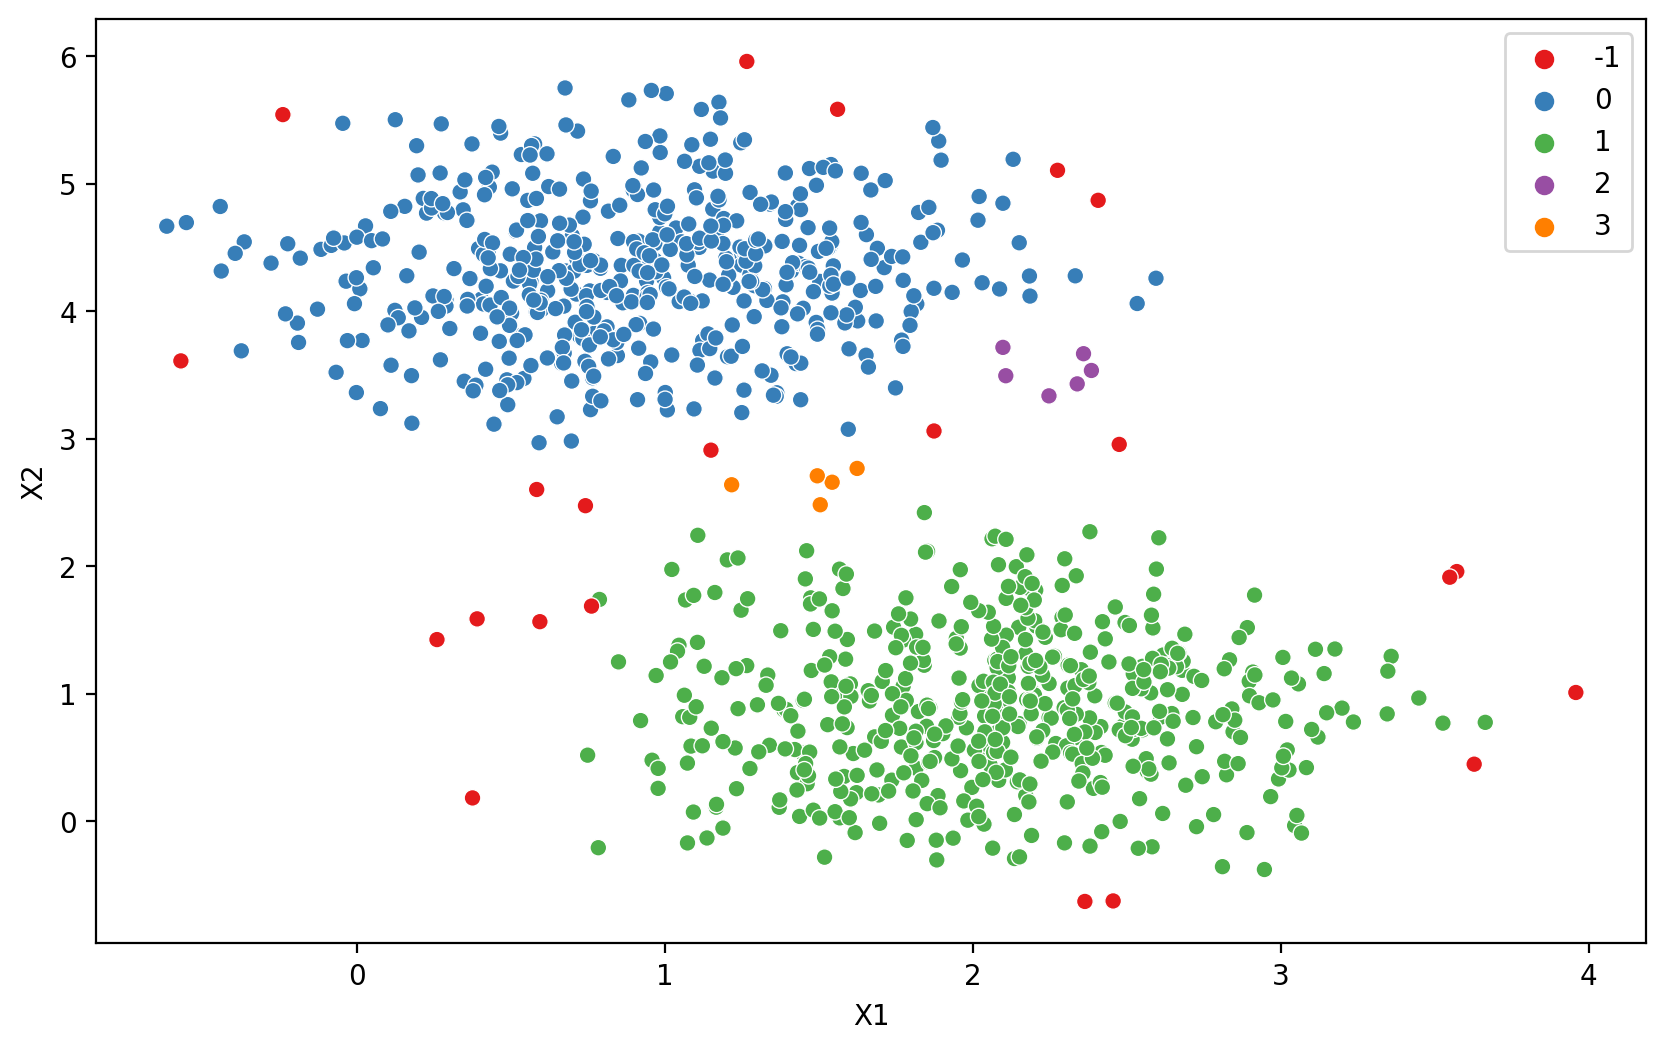

In [60]:
#To find the good epsilon, we need to expriment, this requires subject matter expertise, 
# or if there is a clear distinction between the clusters and the outliers.
plt.figure(figsize=(10,6),dpi=200)
dbscan = DBSCAN(eps=0.3)
display_categories(dbscan,two_blobs_outliers)

In [61]:
dbscan.labels_

array([ 0,  2,  0,  1,  1,  0,  1,  0,  0,  1,  0,  1,  1,  1,  0,  0,  1,
        1,  1,  1,  0,  0,  1,  0,  0,  1,  0,  0,  0,  0,  1,  1,  0,  0,
        0,  0,  0,  1,  0,  1,  1,  0,  0,  1,  1,  1,  1,  1,  0,  1,  1,
        1,  1,  0,  1,  0,  0,  1,  1,  1,  0,  0,  1,  0,  1,  0,  1,  0,
        1,  1,  1,  0,  1,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  0,  1,  1,  0,  1, -1,  0,  0,  0,  1,  0,  1,  0,  1,  0,  1,
        0,  0,  0,  0,  0,  1,  0,  1,  0,  1,  1,  0,  0,  1,  0,  0,  1,
        1,  1,  0,  0,  0,  0,  1,  0, -1,  0,  0,  1,  0,  0,  0,  1, -1,
        1,  1,  1,  0,  0,  0,  1,  1,  1,  0,  1,  1,  1,  0,  0,  0,  1,
        1,  0,  0,  0,  1,  1,  0, -1,  0,  0,  0,  1, -1,  0,  0, -1,  0,
        0,  1,  1,  1,  0,  1,  0,  0,  0,  0,  1,  0,  0,  1,  0,  1,  1,
        1,  0,  1,  0,  1,  1,  1,  0,  1,  1,  1,  1,  0,  1,  1,  0,  0,
       -1,  1,  1,  1,  2,  0,  0,  0,  0,  1,  0,  0,  0,  1,  0,  1,  1,
        0,  0,  0,  0,  0

In [62]:
dbscan.labels_ == -1

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,

In [63]:
np.sum(dbscan.labels_ == -1)

22

In [64]:
100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)

2.2

## Charting reasonable Epsilon values

In [68]:
# Elbow Method or Knee Method
# Kneedle Python lib

In [69]:
outlier_percent = []
number_of_outliers = []

for eps in np.linspace(0.001,10,100):
    
    # Create Model
    dbscan = DBSCAN(eps=eps)
    dbscan.fit(two_blobs_outliers)
    
    # Log Number of Outliers
    number_of_outliers.append(np.sum(dbscan.labels_ == -1))
    
    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)
    

Text(0.5, 0, 'Epsilon Value')

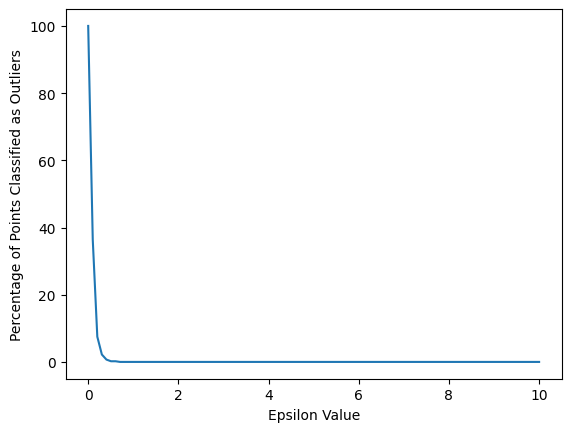

In [70]:
sns.lineplot(x=np.linspace(0.001,10,100),y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")

(0.0, 1.0)

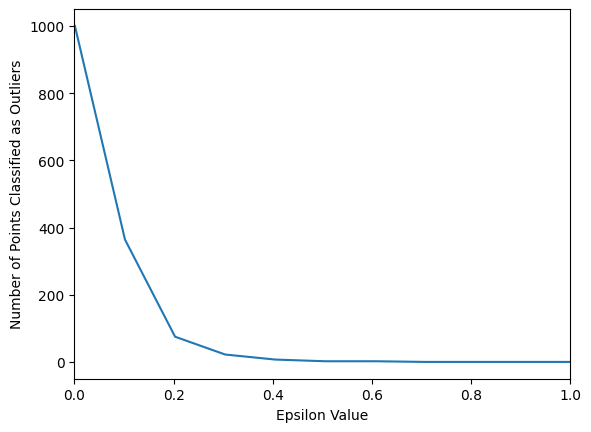

In [71]:
sns.lineplot(x=np.linspace(0.001,10,100),y=number_of_outliers)
plt.ylabel("Number of Points Classified as Outliers")
plt.xlabel("Epsilon Value")
plt.xlim(0,1)

### Do we want to think in terms of percentage targeting instead?

If so, you could "target" a percentage, like choose a range producing 1%-5% as outliers.

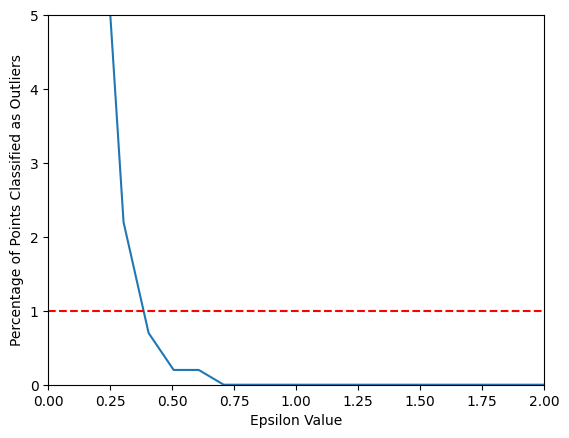

In [72]:
sns.lineplot(x=np.linspace(0.001,10,100),y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")
plt.ylim(0,5)
plt.xlim(0,2)
plt.hlines(y=1,xmin=0,xmax=2,colors='red',ls='--')

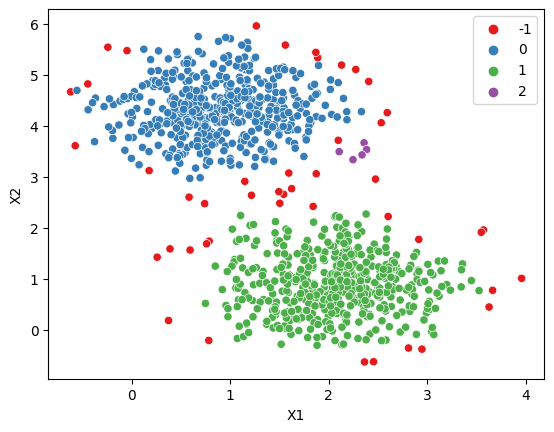

In [74]:
# How to find a good epsilon?
dbscan = DBSCAN(eps=0.25)
display_categories(dbscan,two_blobs_outliers)

### Do we want to think in terms of number of outliers targeting instead?

If so, you could "target" a number of outliers, such as 3 points as outliers.

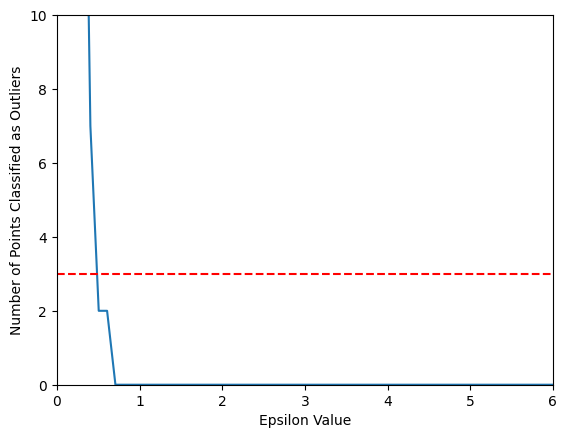

In [75]:
sns.lineplot(x=np.linspace(0.001,10,100),y=number_of_outliers)
plt.ylabel("Number of Points Classified as Outliers")
plt.xlabel("Epsilon Value")
plt.ylim(0,10)
plt.xlim(0,6)
plt.hlines(y=3,xmin=0,xmax=10,colors='red',ls='--')

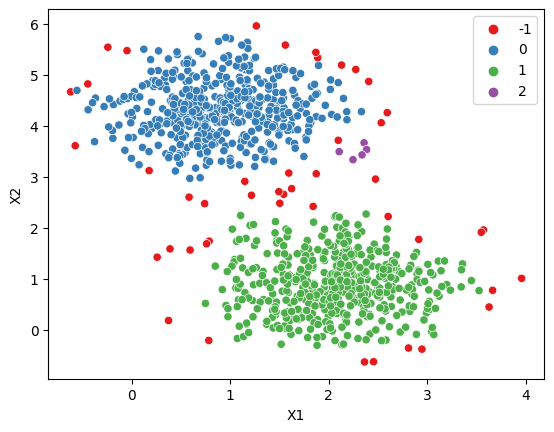

In [77]:
# How to find a good epsilon?
dbscan = DBSCAN(eps=0.25)
display_categories(dbscan,two_blobs_outliers)

## Minimum Samples

     |  min_samples : int, default=5
     |      The number of samples (or total weight) in a neighborhood for a point
     |      to be considered as a core point. This includes the point itself.
     

How to choose minimum number of points?

https://stats.stackexchange.com/questions/88872/a-routine-to-choose-eps-and-minpts-for-dbscan

In [78]:
outlier_percent = []

for n in np.arange(1,100):
    
    # Create Model
    dbscan = DBSCAN(min_samples=n)
    dbscan.fit(two_blobs_outliers)
    
    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)
    

Text(0.5, 0, 'Minimum Number of Samples')

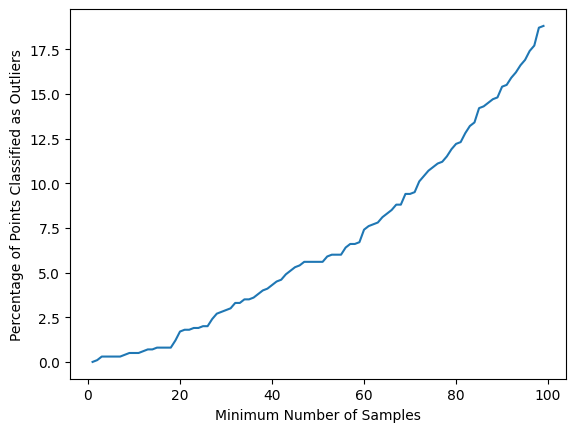

In [79]:
sns.lineplot(x=np.arange(1,100),y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Minimum Number of Samples")

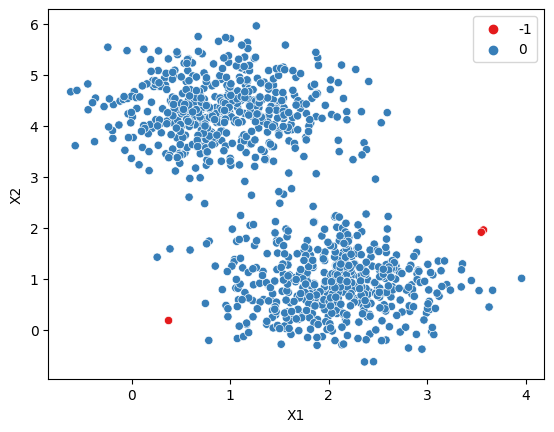

In [80]:
num_dim = two_blobs_outliers.shape[1]

dbscan = DBSCAN(min_samples=2*num_dim)
display_categories(dbscan,two_blobs_outliers)

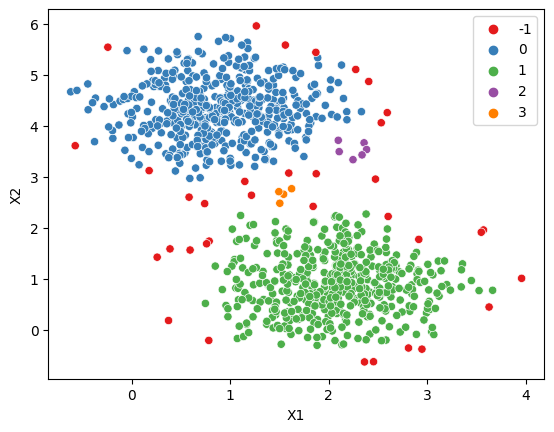

In [82]:
num_dim = two_blobs_outliers.shape[1]

dbscan = DBSCAN(eps=0.25,min_samples=2*num_dim)
display_categories(dbscan,two_blobs_outliers)

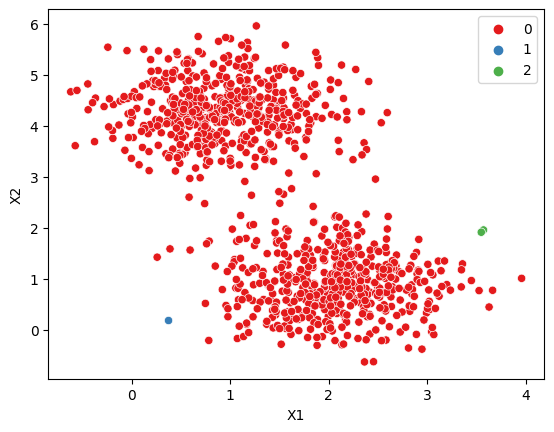

In [83]:
dbscan = DBSCAN(min_samples=1)
display_categories(dbscan,two_blobs_outliers)

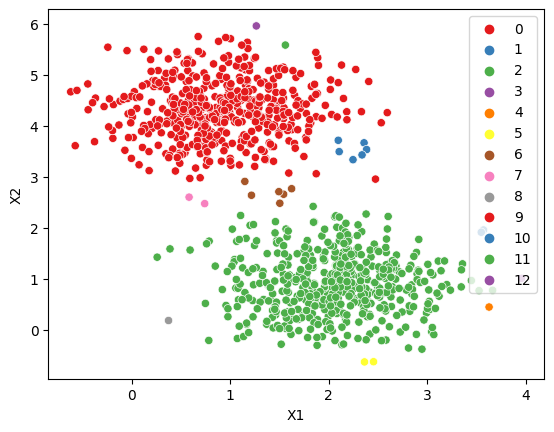

In [85]:
dbscan = DBSCAN(eps=0.3,min_samples=1)
display_categories(dbscan,two_blobs_outliers)

----